In [1]:
import math
import matplotlib.pyplot as plt
import numpy

In [72]:
#инициализация
m = list(map(float, input().split()))
R1 = 8
R2 = 16
g = 9.81
m = [mi + 16.1 for mi in m]
print (*m)

45 63.5 73.63 100
61.1 79.6 89.72999999999999 116.1


In [73]:
# моменты
M = [mi * g * R1 * 10 ** (-6) for mi in m] + [mi * g * R2 * 10 ** (-6) for mi in m]
print (*M)

0.004795128 0.006247007999999999 0.007042010399999999 0.009111528 0.009590256 0.012494015999999998 0.014084020799999998 0.018223056


In [78]:
# Пора и b0 наконец...
b0 = list(map(float, input().split()))
b0 = [bi * 10 ** (-2) for bi in b0]
print (*b0)

33 38.6 45.1 57.5 44.4 61.1 73.5 99.6
0.33 0.386 0.451 0.5750000000000001 0.444 0.611 0.735 0.996


In [92]:
# МНК - впервые в жизни (мне наконец-то сказали, что в лабнике есть формулы на с 39)
sr = lambda mass: sum (mass) / len (mass)

# b0 = K * M + B
a1 = [M[i] * b0[i] for i in range (len (M))]
a1 = sr (a1)

a2 = [Mi ** 2 for Mi in M]
a2 = sr (a2)
print ("a1, a2: ", a1, a2, "\n")

sr_b0 = sr (b0)
sr_M  = sr (M)
print ("Middles: ", sr_b0, sr_M, "\n")

K = (a1 - sr_M * sr_b0 ) / (a2 - sr_M ** 2)
B = sr_b0 - K * sr_M
print ("K, B: ", K, B, '\n')

# Нужные величины:

# M0:
print ("M0: ", -B / K)

# b0:
print ("b0: ", 1 / K)

a1, a2:  0.0050674489893 0.00012164263403558758 

Middles:  0.39725 0.0101983779 

K, B:  57.61847201062965 -0.19036495158497402 

M0:  0.003303887537140083
b0:  0.017355545280956366


In [33]:
# прямая по МНК
b0_new = [K*Mi + B for Mi in M]
print (*b0_new)

0.08708970868191057 0.1679927373650385 0.21648935735218722 0.3356744336859351 0.3632447395500177 0.5250507969162735 0.622044036890571 0.8604141895580667


In [79]:
# Подгон значений, запускать, пока прямая не пойдёт там, где надо. if лучше убрать.
# Upd: Подогнано под меня, просто поиграться надо с этой хренью.
for i in range (8):
    if (i == 7 or i < 4):
        b0 [i] -= 0.27

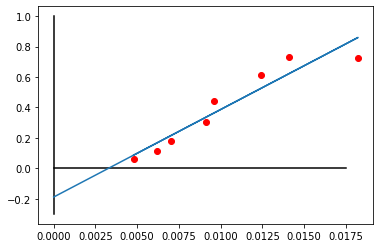

In [34]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

# - Брат, с чего начинается построение графика?
# - С оси, брат.
# - Опять?!
ax1.plot ([0, 0.0175], [0, 0], color = "black");
ax1.plot ([0, 0], [-0.3, 1], color = "black");

ax1.plot (M + [0], b0_new + [B]);
ax1.scatter (M, b0, color = "red");

In [80]:
# надо ж узнать, что наподгонял...
print (*b0)

0.06 0.11599999999999999 0.181 0.30500000000000005 0.444 0.611 0.735 0.726


        Там ещё что-то дальше:

In [3]:
R = list(map(float, input().split()))
b0_hren = list(map(float, input().split()))

print (*R)
print (*b0_hren)

14 21.6 18.6 3.4 
1 0.54 0.66 2.79
14.0 21.6 18.6 3.4
1.0 0.54 0.66 2.79


In [82]:
# Подгон? - Нет, корректировка.
b0_hren = [b0_hren[i] - 0.274 for i in range (4)]
print (*b0_hren)

0.726 0.266 0.386 2.516


In [83]:
mn = (100 + 16.1) * 10 ** (-3)
M0 = 3.2 * 10 ** (-3)
r  = 16 * 10 ** (-3)

I = [(mn * g * r - M0) / b0_hren[i] - mn * r **2 for i in range(4)]
print (*I)

0.020663193000550965 0.05644793253533835 0.0388901125968912 0.005941286349125597


In [85]:
# Опять ввод
R_hren = list(map(float, input().split()))
R_hren = [(R_hreni / 100) ** 2 for R_hreni in R_hren]
print (*R_hren)

14 21.6 18.6 3.4
0.019600000000000003 0.04665600000000001 0.03459600000000001 0.0011560000000000001


In [95]:
# НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА! НЕ КОПИПАСТА!

# МНК - впервые в жизни (мне наконец-то сказали, что в лабнике есть формулы на с 39)
# sr = lambda mass: sum (mass) / len (mass)

# I = K_ * R**2 + B_
a1_ = [R_hren[i] * I[i] for i in range (len (R_hren))]
a1_ = sr (a1_)

a2_ = [R_hreni ** 2 for R_hreni in R_hren]
a2_ = sr (a2_)
print ("a1_, a2_: ", a1_, a2_, "\n")

sr_I = sr (I) # Да не хочу я!
sr_R_hren  = sr (R_hren)
print ("Middles: ", sr_I, sr_R_hren, "\n")

K_ = (a1_ - sr_R_hren * sr_I ) / (a2_ - sr_R_hren ** 2)
B_ = sr_I - K_ * sr_R_hren

print ("K_, B_: ", K_, B_, '\n')

# КОД НЕЧИТАЕМ - МИССИЯ ВЫПОЛНЕНА!!!

a1_, a2_:  0.0010977359464002957 0.0009397904720000004 

Middles:  0.030485631120476527 0.025502000000000007 

K_, B_:  1.106595760332393 0.0022652260404798334 



In [99]:
# 0.05 - подгон по наибольшему!
R_line = [0, 0.05]

I_line = [B_, K_ * 0.05 + B_]

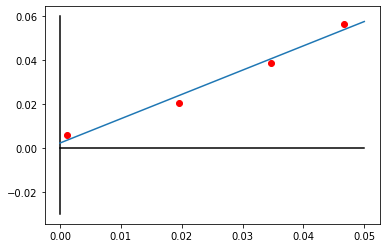

In [100]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)

# Шутка, повторённая 2 раза, сигнализирует о копипасте.
# - Брат, с чего начинается построение графика?
# - С оси, брат.
# - Опять?!
ax2.plot ([0, 0.05], [0, 0], color = "black");
ax2.plot ([0, 0], [-0.03, 0.06], color = "black");

ax2.plot (R_line, I_line);
ax2.scatter (R_hren, I, color = "red");